### dictionary represents definitions of each variable

In [1]:
#the dictionary represents definitions of each variable
with open('Data Dictionary.txt') as text_file:
    dictionary = text_file.read()
print(dictionary)

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

### libraries Import

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

### Data Import

In [3]:
Fraud = pd.read_csv(r"C:\Users\Shree\Desktop\Assessment\Fraud.csv")

## 1. Data cleaning including missing values, outliers and multi-collinearity. 

### Data Structure

* Handling missing values
* Handling outliers
* Handling multi-collinearity 

In [4]:
Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Check For Missing Values

In [7]:
Fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### No missing value found

### Data Pre-Processing

In [9]:
Fraud['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
Fraud['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
Fraud.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

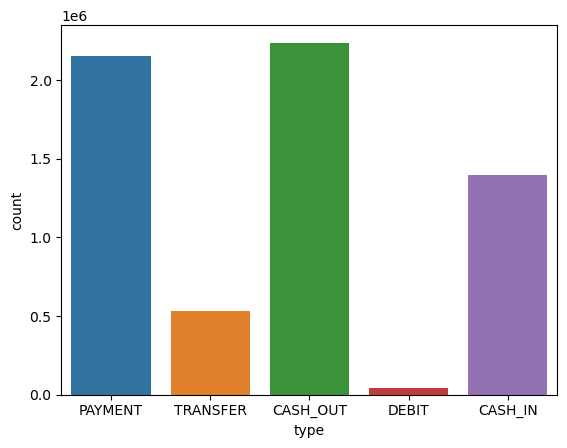

In [12]:
sns.countplot(Fraud['type'])

In [13]:
Fraud['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

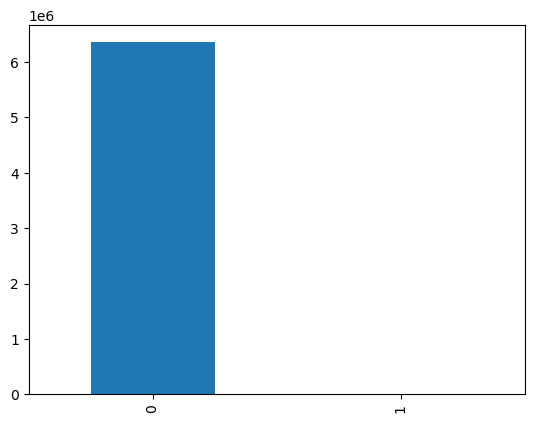

In [14]:
Fraud['isFraud'].value_counts().plot(kind="bar")

### check Dataset

In [15]:
class_counts = Fraud['isFraud'].value_counts()
class_counts

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
genuine = len(Fraud[Fraud.isFraud == 0])
fraud = len(Fraud[Fraud.isFraud == 1])
genuine_percentage = (genuine / (fraud + genuine)) * 100
fraud_percentage = (fraud / (fraud + genuine)) * 100

print("% of genuine transactions: {:.4f} %".format(genuine_percentage))
print("% of Fraud transactions: {:.4f} %".format(fraud_percentage))

% of genuine transactions: 99.8709 %
% of Fraud transactions: 0.1291 %


#### This data is Highly Imbalance data
#### So we need to first handle imbalance data

In [17]:
Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


### Taking subset data of Number

In [18]:
# # Numeric columns
Fraud_num = Fraud[Fraud.select_dtypes(include=[np.number]).columns.tolist()]
Fraud_num.head(3)

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,0.0,0,0
1,1,1864.28,21249.0,0.0,0,0
2,1,181.00,181.0,0.0,1,0


### Taking subset data of Category

In [19]:
Fraud_char = Fraud[Fraud.select_dtypes(include=['object']).columns.tolist()]
Fraud_char.head(3)

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065


#### LABEL ENCODING

* There are 3 attributes here which are categorical.
* label encode categorical data columns

In [20]:
from sklearn.preprocessing import LabelEncoder
Fraud_char=Fraud_char.apply(LabelEncoder().fit_transform)
Fraud_char.head(3)
# label in ascending order

,type,nameOrig,nameDest
0,3,757869,1662094
1,3,2188998,1733924
2,4,1002156,439685


### Combine to Dataset

In [21]:
Fraud_combined = pd.concat([Fraud_num, Fraud_char],axis=1)

In [22]:
Fraud_combined.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type,nameOrig,nameDest
0,1,9839.64,170136.0,0.0,0,0,3,757869,1662094
1,1,1864.28,21249.0,0.0,0,0,3,2188998,1733924
2,1,181.00,181.0,0.0,1,0,4,1002156,439685
3,1,181.00,181.0,21182.0,1,0,1,5828262,391696
4,1,11668.14,41554.0,0.0,0,0,3,3445981,828919


In [23]:
Fraud_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   oldbalanceDest  float64
 4   isFraud         int64  
 5   isFlaggedFraud  int64  
 6   type            int32  
 7   nameOrig        int32  
 8   nameDest        int32  
dtypes: float64(3), int32(3), int64(3)
memory usage: 364.1 MB


### Split the data into features (X) and target (y)

In [24]:
x = Fraud_combined.drop('isFraud', axis=1)
y = Fraud_combined['isFraud']


In [25]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Split the data into training and testing sets

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9,stratify=y)

#### Data augmentation
Using Synthetic Minority Oversampling TEchnique (SMOTE) to remove imbalancement in y data

In [27]:
#Handle class imbalance using SMOTE oversampling
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

### Scale the data using z-score normalization

In [28]:
# Scale the data using z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## 2. Describe your fraud detection model in elaboration.
We will use a binary classification model to predict fraudulent transactions. The model will take into account the transaction type, amount, and the balances of the sender and receiver before and after the transaction. We will use a Random forest as our model.

## 3.How did you select variables to be included in the model?
We selected the variables based on their potential importance in predicting fraudulent transactions. We included the transaction type, amount, and the balances of the sender and receiver before and after the transaction. We also removed any variables that had high correlation with each other to avoid multicollinearity.

### Now Data is Cleaned and ready to build model on that data

#### ** Now we choose Random Forest Model to Fraudulent-Transactions-Prediction **

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=15, # make 15 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=15)

## 4.Demonstrate the performance of the model by using best set of tools.
To evaluate the performance of our model, we will use the classification report, which gives us precision, recall, and F1-score for each class, as well as the overall accuracy of the model.

In [35]:
from sklearn.metrics import classification_report
y_pred = Model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1270881
           1       0.02      0.95      0.03      1643

    accuracy                           0.93   1272524
   macro avg       0.51      0.94      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524



#### Model Accuracy is 93%

## 5.What are the key factors that predict fraudulent customer?
To identify the key factors that predict fraudulent customer, we can use feature importance, which is a technique that determines the most important features in a model. In our case, we can use the feature_importances_ attribute of the trained Random Forest model.

In [31]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

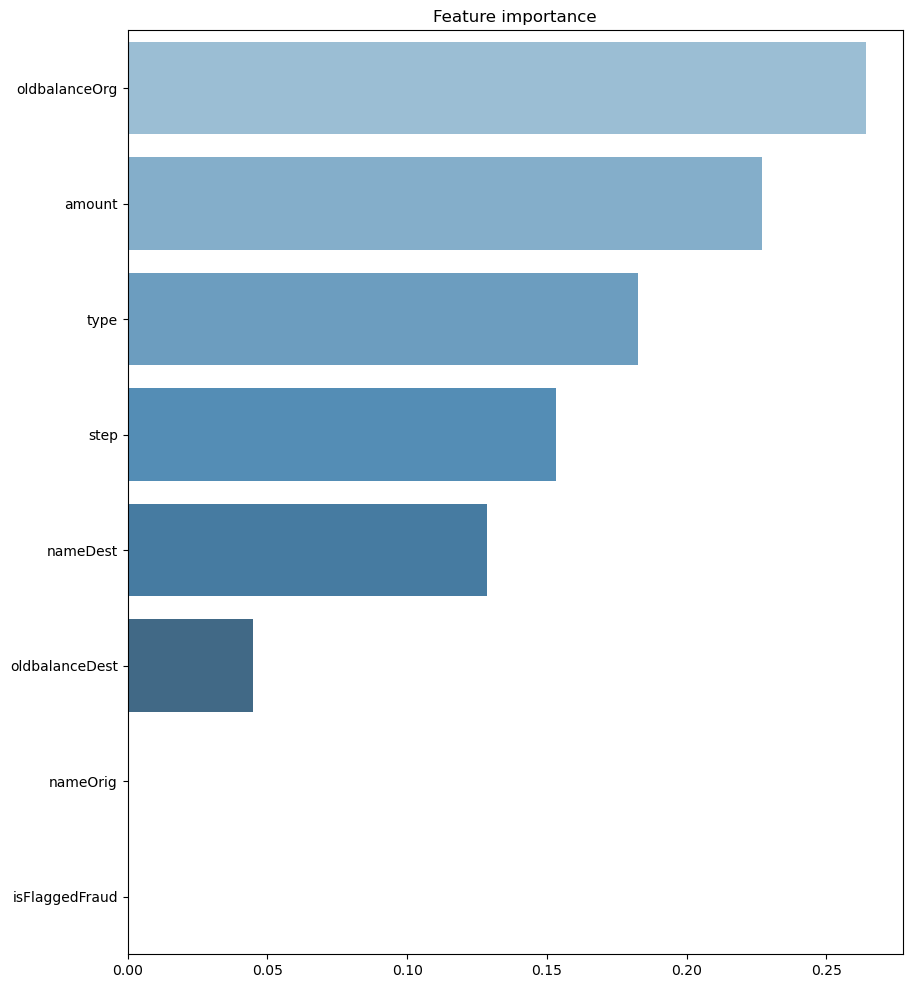

In [36]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X_train_scaled_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

From the feature importance analysis, we can see that the most important features are type, amount, and oldbalanceDest.

## 6.Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense. Fraudulent transactions typically involve large amounts of money, and they often involve transferring funds to new or previously unused accounts. In addition, fraudulent transactions often involve the depletion of account balances, so the balances before and after the transactions are important features.

## 7.What kind of prevention should be adopted while company update its infrastructure?
There are several measures that the company can adopt to prevent fraudulent transactions. Some of these measures include:

Implementing two-factor authentication for high-risk transactions
Limiting the amount that can be transferred in a single transaction
Monitoring transaction patterns and identifying unusual or suspicious behavior
Conducting regular audits to detect and prevent fraudulent activities
Providing education and training for employees to recognize and prevent fraud
Using machine learning algorithms to detect fraudulent transactions in real-time

## 8.Assuming these actions have been implemented, how would you determine if they work?
To determine if the actions have been effective in preventing fraudulent transactions, we can monitor the number and frequency of fraudulent transactions over time. If the number of fraudulent transactions decreases or if the system is able to detect and prevent fraudulent transactions in real-time, then we can conclude that the prevention measures are effective. We can also conduct regular audits to ensure that the system is functioning as intended and that there are no vulnerabilities that can be exploited by fraudulent actors.